# IBM: DA0101EN

## Analyzing Data with Python

### Final Assignment -  Analyzing where people drink?

### Description

This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.

In [2]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
#Import data
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv'
df = pd.read_csv(url)

In [4]:
df.shape

(193, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [7]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [8]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


No missing data. All data types seem ok. This suggests clean data.

**Question 1**: Display the data types of each column using the attribute dtype.

In [9]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

**Question 2**: Use the method groupby to get the number of wine servings per continent:

In [10]:
df.groupby('continent').wine_servings.sum()

continent
Africa            862
Asia              399
Europe           6400
North America     564
Oceania           570
South America     749
Name: wine_servings, dtype: int64

**Question 3**: Perform a statistical summary and analysis of beer servings for each continent:

In [12]:
df.groupby('continent').beer_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


**Question 4**: Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent:

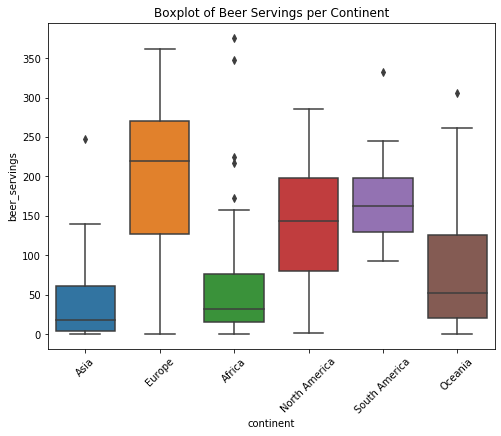

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(df.continent, df.beer_servings)
plt.xticks(rotation = 45)
plt.title('Boxplot of Beer Servings per Continent', fontsize = 12)
plt.show()

**Question 5**: Use the function  regplot in the seaborn library to determine if the number of wine servings is negatively or positively correlated with the number of beer servings.

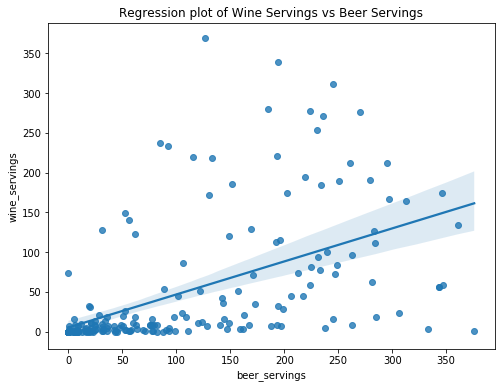

In [19]:
plt.figure(figsize=(8,6))
sns.regplot(df.beer_servings, df.wine_servings)
plt.title('Regression plot of Wine Servings vs Beer Servings', fontsize = 12)
plt.show()

There is a positive correlation between Wine Servings and Beer Servings

**Question 6**: Fit a linear regression model to predict the 'total_litres_of_pure_alcohol' using the number of 'wine_servings' then calculate  $R^{2}$ :

In [25]:
#Instantiate a linear reg. model and create x, y variables

lm = LinearRegression()
x = df[['wine_servings']]
y = df['total_litres_of_pure_alcohol']

In [30]:
#Fit and score model to get R^2

lm.fit(x,y)
print(f"R^2: {lm.score(x,y)}")

R^2: 0.4456875459787605


**Question 7**: Use the list of features to predict the 'total_litres_of_pure_alcohol', split the data into training and testing and determine the $R^2$ on the test data, using the provided code:

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Create features and target variables

X = df[['beer_servings', 'spirit_servings','wine_servings']]
y = df['total_litres_of_pure_alcohol']

In [47]:
#Split into training and testing set

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
#Fit on training data and score on testing data to get R^2

lm.fit(x_train,y_train)
print(f"R^2: {lm.score(x_test,y_test)}")

R^2: 0.732482023911073


An $R^2$ of 0.73 is a good start. There is room for improvement by normalization of the data.

**Question 8**: Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the $R^2$ using. the test data. Take a screenshot of your code and the $R^2$ . There are some hints in the notebook:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [56]:
#Instantiate the scaler and polynominal features. Then build the pipeline. 

my_scaler = StandardScaler()
my_poly = PolynomialFeatures(include_bias=False)

my_pipeline = Pipeline([('scale', my_scaler), ('polynomial', my_poly), ('model', lm)])

In [57]:
my_pipeline.fit(x_train, y_train)
print(f"R^2: {my_pipeline.score(x_test,y_test)}")

R^2: 0.7405648915473032


Not much change in $R^2$. The default polynominal degree is 2. We can use GridSearchCV to determine the optimum value for the hyperparameter, degree.

**Question 9**: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^2$ using the test data. Take a screenshot of your code and the $R^2$

In [58]:
from sklearn.linear_model import Ridge

In [87]:
#Instantiate Ridge regression model 

RR = Ridge(alpha=0.1, random_state=0)

In [88]:
#Fit on training data and score on testing data to get R^2

RR.fit(x_train,y_train)
print(f"R^2: {RR.score(x_test,y_test)}")

R^2: 0.7324820360227452


**Question 10** : Perform a 2nd order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^2$ utilizing the test data provided. Take a screen-shot of your code and the $R^2$.

In [97]:
#Use another pipeline to accomplish this
#By default the polynomial transform is already 2nd degree

my_poly2 = PolynomialFeatures(include_bias=False, degree=2)
RR2 = Ridge(alpha=0.1, random_state=0)
pipeline_2 = Pipeline([('polynomial', my_poly2), ('model', RR2)])

In [98]:
#Fit on training data and score on testing data to get R^2

pipeline_2.fit(x_train,y_train)
print(f"R^2: {pipeline_2.score(x_test,y_test)}")

R^2: 0.7405649676907746


**Bonus 1**
Perform a GridSearch to determine best value for hyperparameter, alpha

In [74]:
from sklearn.model_selection import GridSearchCV

In [90]:
params_rr = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
GSrr = GridSearchCV(RR, params_rr, cv=4)
GSrr.fit(x_train, y_train)
GSrr.best_estimator_

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

**Bonus 2** Create an Interact widget to manually select hyperparameters to see the effect on $R^2$

In [100]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [114]:
def my_func(degree,alpha):
    my_scaler = StandardScaler()
    my_poly = PolynomialFeatures(include_bias=False, degree=degree)
    RR = Ridge(alpha=alpha, random_state=0)
    
    my_pipeline = Pipeline([('scale', my_scaler), ('polynomial', my_poly), ('model', RR)])
    my_pipeline.fit(x_train, y_train)
    
    print(f"R^2: {my_pipeline.score(x_test,y_test)}")
    

In [115]:
interact(my_func, degree=(2,5), alpha=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])

interactive(children=(IntSlider(value=3, description='degree', max=5, min=2), Dropdown(description='alpha', op…

<function __main__.my_func(degree, alpha)>

<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook

**Sources**

<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.